In [12]:
import pandas as pd 
import zipfile
zip_path = "Downloads/Amazonrev.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    
    print(z.namelist())  

   
    file_name = z.namelist()[0] 

    with z.open(file_name) as f:
        df = pd.read_csv(f)
df.head()

['Reviews.csv', 'database.sqlite', 'hashes.txt']


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
print("Rows, Columns:", df.shape)
df.info()

Rows, Columns: (568454, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [14]:
print("Rows, Columns:", df.shape)

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [15]:
print("Unique Products:", df['ProductId'].nunique())
print("Unique Users:", df['UserId'].nunique())

Unique Products: 74258
Unique Users: 256059


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.dropna(subset=['ProfileName', 'Summary'], inplace=True)

In [18]:
print("Rows, Columns:", df.shape)

Rows, Columns: (568401, 10)


In [20]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568401 non-null  int64 
 1   ProductId               568401 non-null  object
 2   UserId                  568401 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568401 non-null  int64 
 5   HelpfulnessDenominator  568401 non-null  int64 
 6   Score                   568401 non-null  int64 
 7   Time                    568401 non-null  int64 
 8   Summary                 568401 non-null  object
 9   Text                    568401 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [22]:
print("Rows remaining:", len(df))

Rows remaining: 568401


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

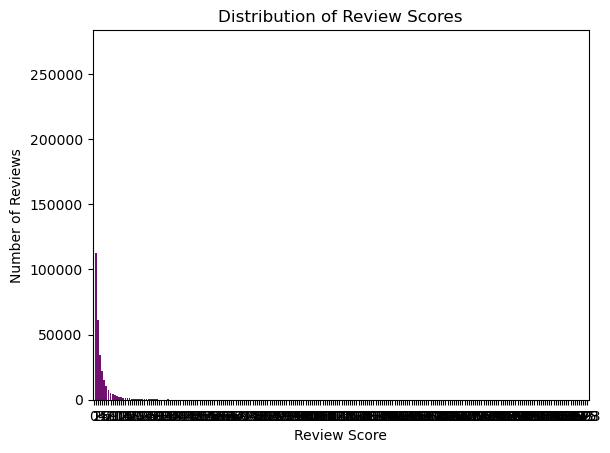

In [37]:

sns.countplot(data=df, x='HelpfulnessDenominator', color ='purple')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
top_products = df['ProductId'].value_counts().head(10)
print(top_products)

ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWP89S    632
B002QWHJOU    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B0026KPDG8    564
Name: count, dtype: int64


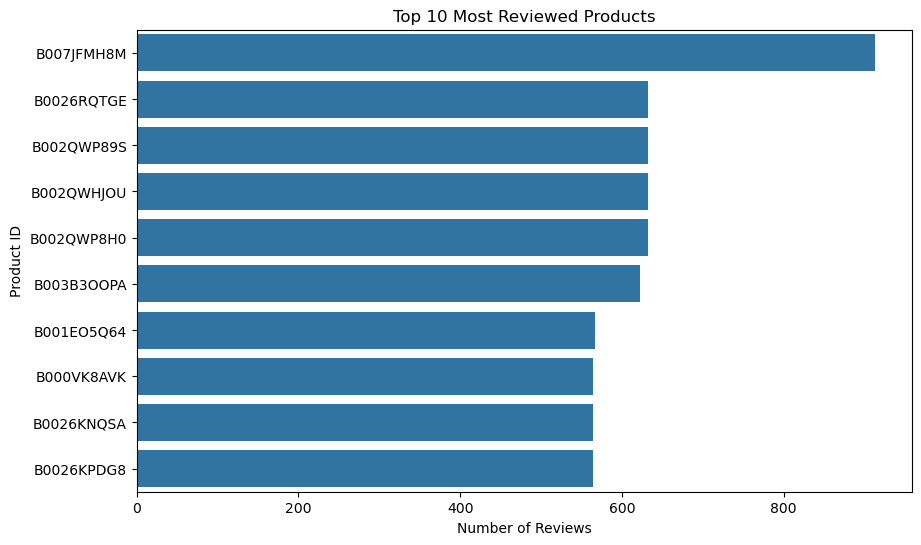

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product ID')
plt.show()

In [43]:
top_10_products = top_products.index.tolist()

In [48]:
print(top_10_products)

['B007JFMH8M', 'B0026RQTGE', 'B002QWP89S', 'B002QWHJOU', 'B002QWP8H0', 'B003B3OOPA', 'B001EO5Q64', 'B000VK8AVK', 'B0026KNQSA', 'B0026KPDG8']


In [52]:
avg_scores = df[df['ProductId'].isin(top_10_products)].groupby('ProductId')['Score'].mean().sort_values(ascending=False)

In [53]:
print(avg_scores)

ProductId
B001EO5Q64    4.746032
B003B3OOPA    4.739968
B0026RQTGE    4.588608
B002QWHJOU    4.588608
B002QWP89S    4.588608
B002QWP8H0    4.588608
B007JFMH8M    4.582694
B000VK8AVK    4.310284
B0026KNQSA    4.310284
B0026KPDG8    4.310284
Name: Score, dtype: float64


C:\Users\HOME\AppData\Local\Temp\ipykernel_1160\2212091475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='coolwarm')


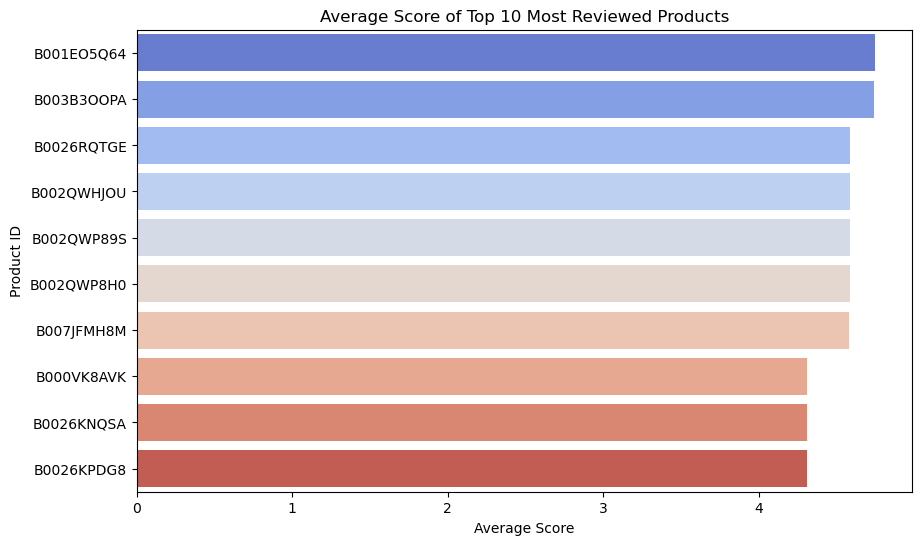

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='coolwarm')
plt.title('Average Score of Top 10 Most Reviewed Products')
plt.xlabel('Average Score')
plt.ylabel('Product ID')
plt.show()

In [55]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Year'] = df['Time'].dt.year

In [56]:
yearly_avg = df.groupby('Year')['Score'].mean()

In [57]:
print(yearly_avg)

Year
1999    5.000000
2000    4.531250
2001    3.538462
2002    4.712329
2003    4.325758
2004    4.392157
2005    4.445693
2006    4.313446
2007    4.394029
2008    4.345344
2009    4.300365
2010    4.198882
2011    4.143825
2012    4.117848
Name: Score, dtype: float64


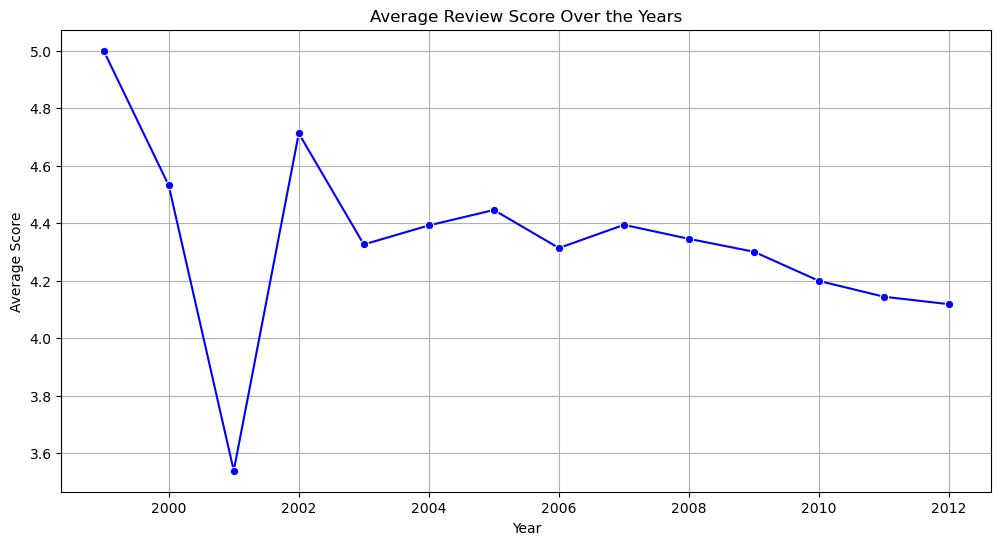

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker='o', color='blue')
plt.title('Average Review Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

In [59]:
top_users = df['UserId'].value_counts().head(10)
print(top_users)

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: count, dtype: int64


C:\Users\HOME\AppData\Local\Temp\ipykernel_1160\2169234302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')


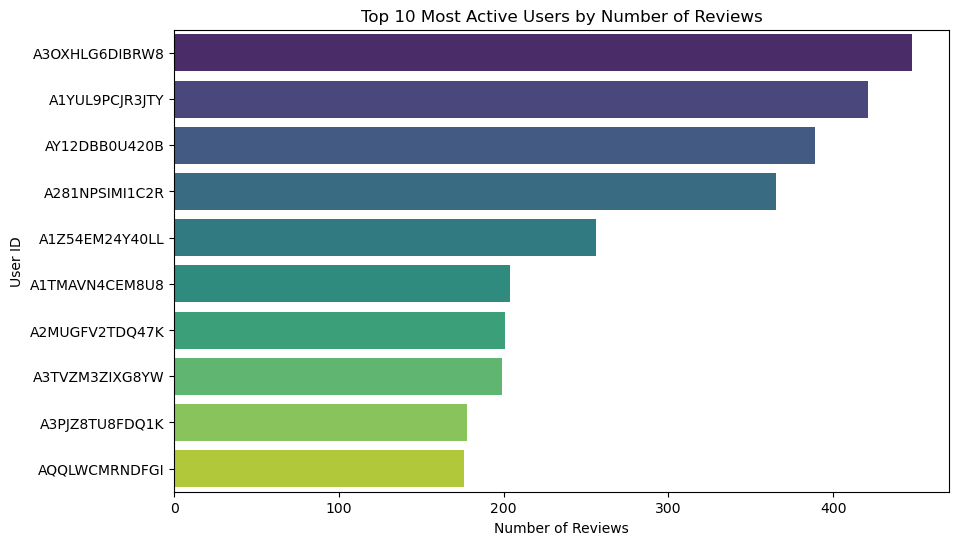

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')
plt.title('Top 10 Most Active Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.show()

In [61]:
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
print (df['HelpfulnessRatio'])

0         1.0
1         NaN
2         1.0
3         1.0
4         NaN
         ... 
568449    NaN
568450    NaN
568451    1.0
568452    1.0
568453    NaN
Name: HelpfulnessRatio, Length: 568401, dtype: float64


In [63]:
df['HelpfulnessRatio'].fillna(0)

0         1.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
568449    0.0
568450    0.0
568451    1.0
568452    1.0
568453    0.0
Name: HelpfulnessRatio, Length: 568401, dtype: float64

In [64]:
user_helpfulness = df.groupby('UserId').agg({'HelpfulnessRatio':'mean', 'Id':'count'})

In [66]:
print(user_helpfulness)

                    HelpfulnessRatio  Id
UserId                                  
#oc-R103C0QSV1DF5E          0.500000   1
#oc-R109MU5OBBZ59U          0.000000   1
#oc-R10LFEMQEW6QGZ          0.000000   1
#oc-R10LT57ZGIB140          0.000000   1
#oc-R10UA029WVWIUI          0.000000   1
...                              ...  ..
AZZV9PDNMCOZW               0.333333   3
AZZVNIMTTMJH6               0.000000   1
AZZY649VYAHQS               1.000000   1
AZZYCJOJLUDYR               0.000000   1
AZZZOVIBXHGDR               0.000000   1

[256042 rows x 2 columns]


In [67]:

top_user_helpfulness = user_helpfulness.loc[top_users.index]


In [68]:
print(top_user_helpfulness)

                HelpfulnessRatio   Id
UserId                               
A3OXHLG6DIBRW8          0.483277  448
A1YUL9PCJR3JTY          0.824833  421
AY12DBB0U420B           0.387707  389
A281NPSIMI1C2R          0.563694  365
A1Z54EM24Y40LL          0.537522  256
A1TMAVN4CEM8U8          0.338235  204
A2MUGFV2TDQ47K          0.402306  201
A3TVZM3ZIXG8YW          0.653570  199
A3PJZ8TU8FDQ1K          0.606069  178
AQQLWCMRNDFGI           0.822564  176


C:\Users\HOME\AppData\Local\Temp\ipykernel_1160\4129887313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_user_helpfulness['HelpfulnessRatio'], y=top_user_helpfulness.index, palette='coolwarm')


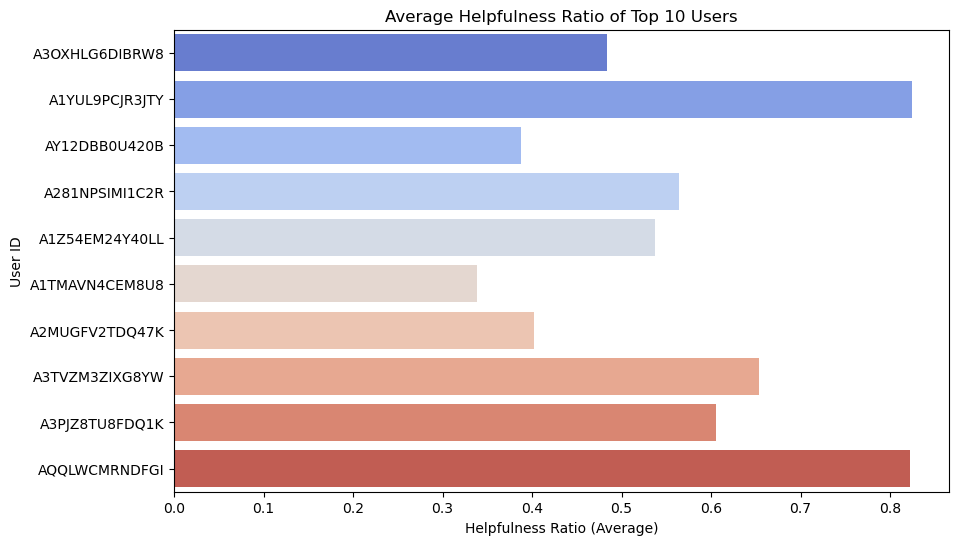

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_user_helpfulness['HelpfulnessRatio'], y=top_user_helpfulness.index, palette='coolwarm')
plt.title('Average Helpfulness Ratio of Top 10 Users')
plt.xlabel('Helpfulness Ratio (Average)')
plt.ylabel('User ID')
plt.show()

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [75]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


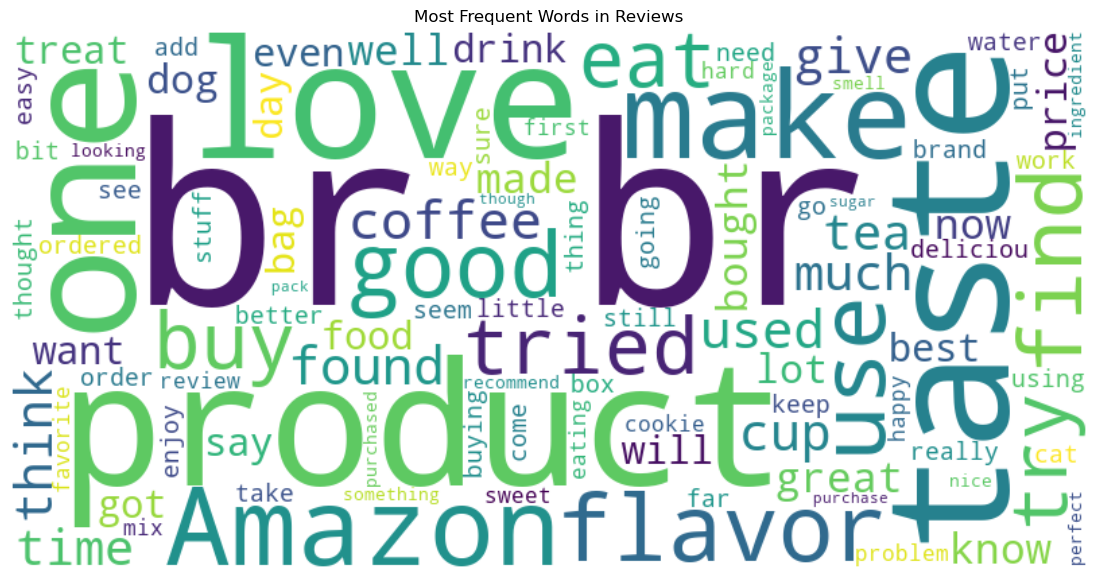

In [77]:
text = ' '.join(df['Text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

# Plot the word cloud
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()

In [79]:
pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



C:\Users\HOME\AppData\Local\Temp\ipykernel_1160\1026060637.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


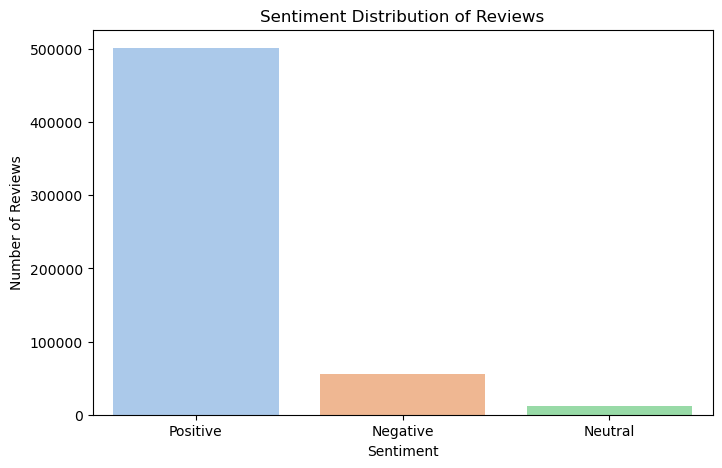

In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['SentimentScore'] = df['Text'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])

def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['SentimentScore'].apply(categorize_sentiment)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [81]:
sentiment_counts = df.groupby(['ProductId', 'Sentiment']).size().unstack(fill_value=0)

In [82]:
sentiment_counts['Total'] = sentiment_counts.sum(axis=1)


In [83]:
top_positive = sentiment_counts.sort_values(by='Positive', ascending=False).head(5)


In [84]:
top_negative = sentiment_counts.sort_values(by='Negative', ascending=False).head(5)

In [85]:
plt.figure(figsize=(14,6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

C:\Users\HOME\AppData\Local\Temp\ipykernel_1160\121626716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive['Positive'], y=top_positive.index, palette='Greens')
C:\Users\HOME\AppData\Local\Temp\ipykernel_1160\121626716.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_negative['Negative'], y=top_negative.index, palette='Reds')


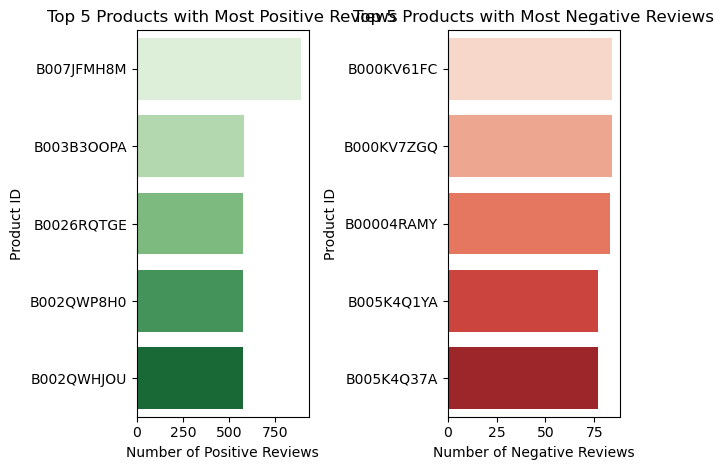

In [86]:
plt.subplot(1, 2, 1)
sns.barplot(x=top_positive['Positive'], y=top_positive.index, palette='Greens')
plt.title('Top 5 Products with Most Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Product ID')
plt.subplot(1, 2, 2)
sns.barplot(x=top_negative['Negative'], y=top_negative.index, palette='Reds')
plt.title('Top 5 Products with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

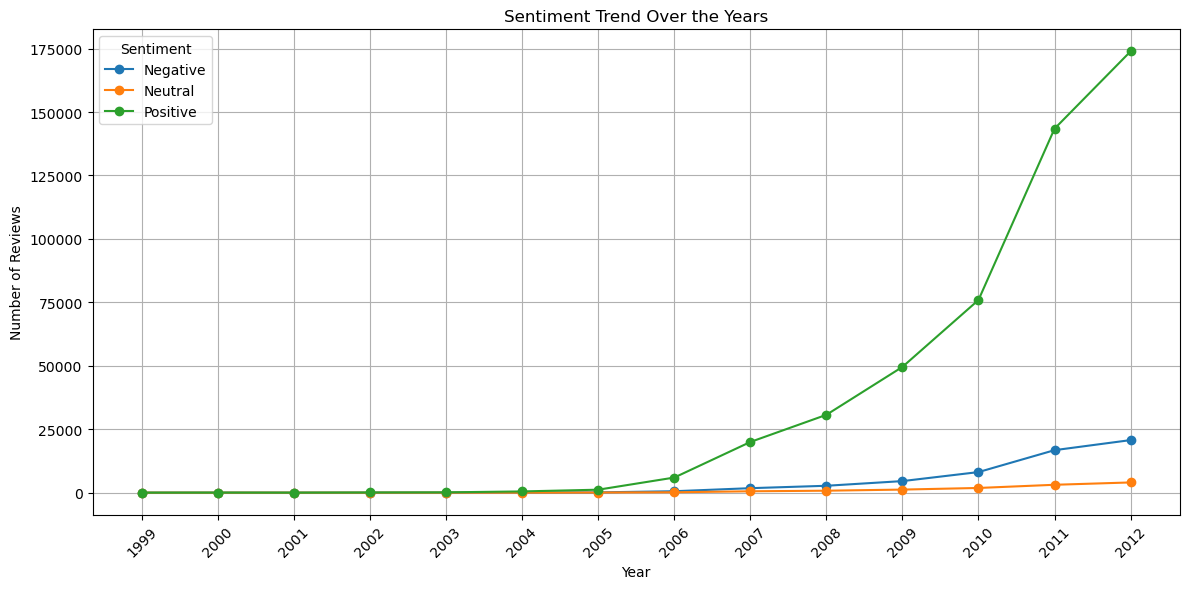

In [87]:
sentiment_yearly = df.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trend
plt.figure(figsize=(12,6))
sentiment_yearly.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Sentiment Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(sentiment_yearly.index, rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [88]:
# Export to CSV
df.to_csv('Amazon_Review_Cleaned_Sentiment.csv', index=False)
print("✅ File saved as: Amazon_Review_Cleaned_Sentiment.csv")

✅ File saved as: Amazon_Review_Cleaned_Sentiment.csv
